In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Importing the Boston House Price Dataset

In [86]:
house_price_dataset = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\codsoft\\HousingData.csv')

In [87]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [88]:
house_price_dataset.shape

(506, 14)

In [89]:
house_price_dataset.rename(columns={'MEDV':'Price'},inplace=True)

In [90]:
house_price_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [91]:
house_price_dataset['CRIM'].fillna(house_price_dataset['CRIM'].mean(),inplace=True)

In [92]:
house_price_dataset['ZN'].fillna(house_price_dataset['ZN'].mean(),inplace=True)

In [93]:
house_price_dataset['INDUS'].fillna(house_price_dataset['INDUS'].mean(),inplace=True)

In [94]:
house_price_dataset['CHAS'].fillna(house_price_dataset['CHAS'].mean(),inplace=True)

In [95]:
house_price_dataset['LSTAT'].fillna(house_price_dataset['LSTAT'].mean(),inplace=True)

In [96]:
house_price_dataset['AGE'].fillna(house_price_dataset['AGE'].mean(),inplace=True)

In [97]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the correlation between various features in the dataset

In [98]:
correlation = house_price_dataset.corr()

<Axes: >

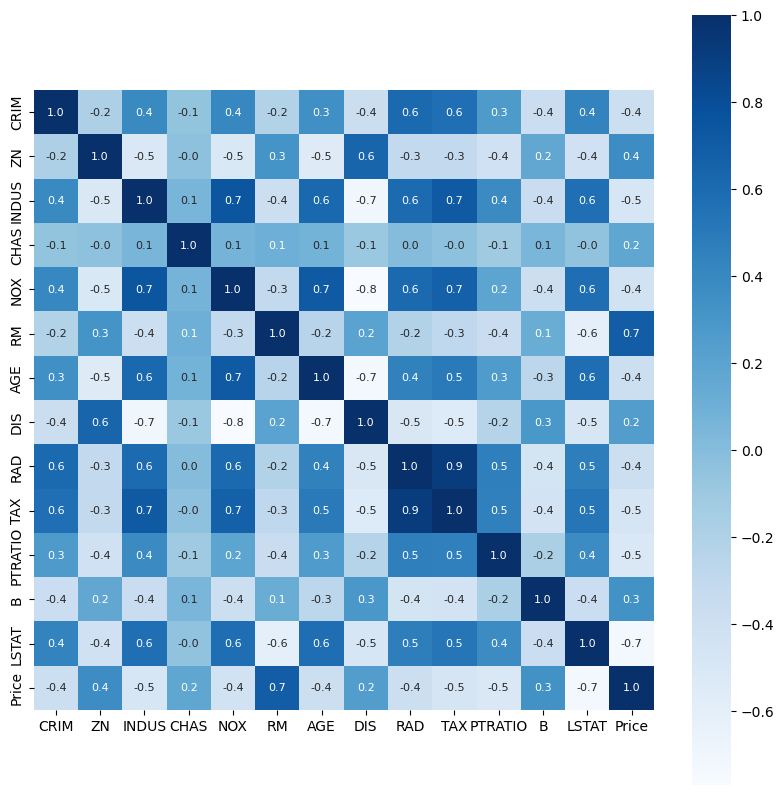

In [99]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

# Splitting the data ans target

In [100]:
x = house_price_dataset.drop(['Price'],axis=1)
y = house_price_dataset['Price']

In [101]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

# Splitting the data into Training data and Test data

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [103]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [104]:
print(y_train.shape)

(404,)


# Model Training

XGBoost Regressor

In [105]:
# loading the model
model = XGBRegressor()

In [106]:
# training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Evaluation

# Prediction on training data

In [107]:
# accuracy for prediction on training data
training_data_prediction = model.predict(x_train)

In [108]:
print(training_data_prediction.shape)

(404,)


In [109]:
# R squared error
score_1 = metrics.r2_score(y_train,training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print("R sqaured error : ", score_1)
print("Mean Absolte Error : ",score_2)

R sqaured error :  0.9999947912270895
Mean Absolte Error :  0.014453256720363575


Visualizing the actual Prices and predicted prices

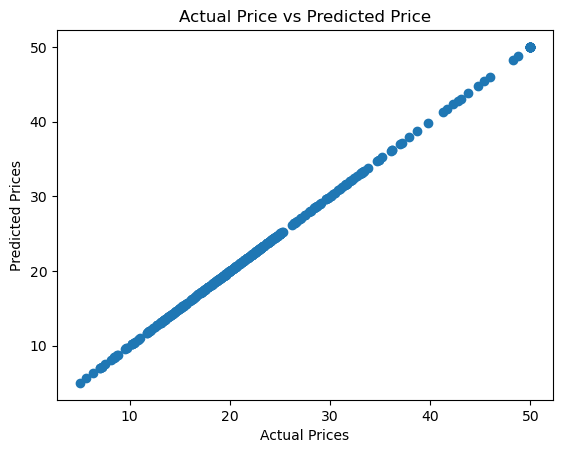

In [110]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Prediction on Test Data

In [111]:
# accuracy for prediction on training  data
test_data_prediction = model.predict(x_test)

In [112]:
test_data_prediction.shape

(102,)

In [113]:
# R squared error
score_1 = metrics.r2_score(y_test,test_data_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ",score_2)

R squared error :  0.8749184856477541
Mean Absolute Error :  2.2837465819190528


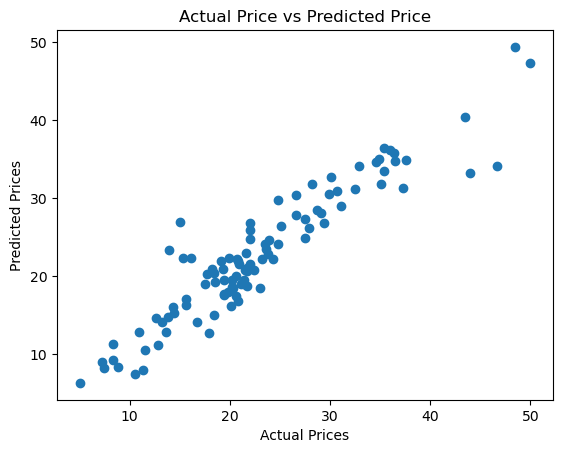

In [114]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()